In [1]:
import pandas as pd              # Veri analizi
import seaborn as sns            # İstatistiksel grafikler
import matplotlib.pyplot as plt  # Grafik çizimi


In [4]:
df = pd.read_csv("nobel_prize_data.csv")


In [5]:
df.head()


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [7]:
df["year"] = df["year"].astype(int)


In [8]:
df["sex"] = df["sex"].fillna("Unknown")


In [9]:
prizes_per_year = df["year"].value_counts().sort_index()


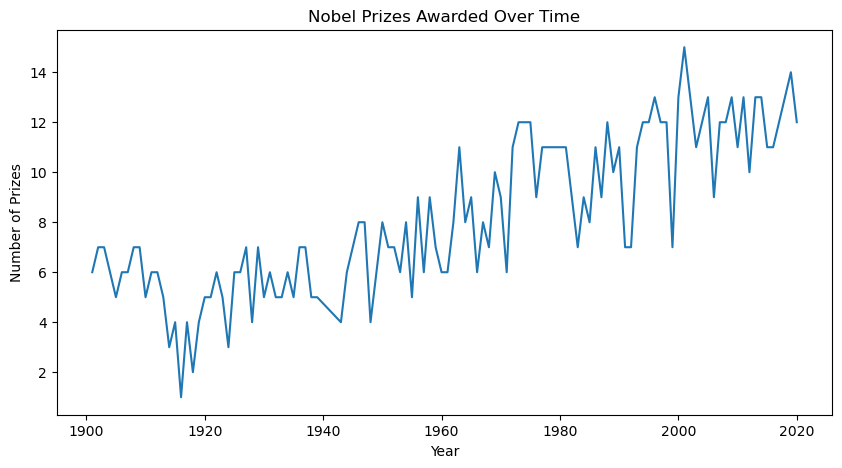

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x=prizes_per_year.index,
    y=prizes_per_year.values
)
plt.title("Nobel Prizes Awarded Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Prizes")
plt.show()


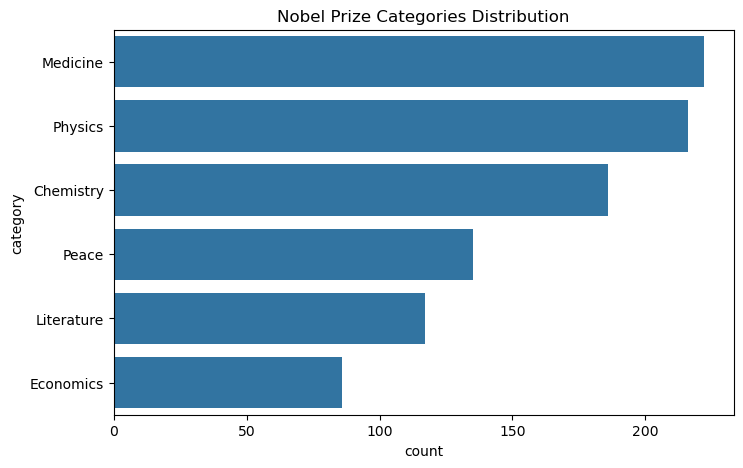

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(
    y="category",
    data=df,
    order=df["category"].value_counts().index
)
plt.title("Nobel Prize Categories Distribution")
plt.show()


In [12]:
gender_counts = df[df["laureate_type"] == "Individual"]["sex"]


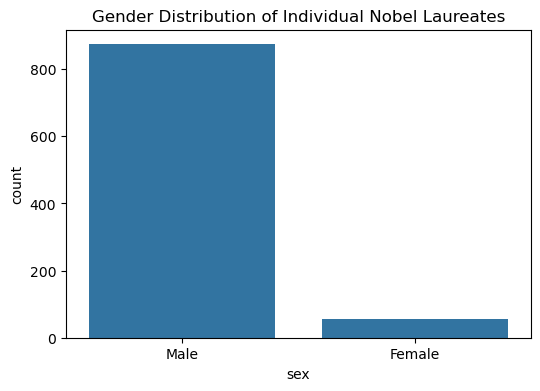

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x=gender_counts)
plt.title("Gender Distribution of Individual Nobel Laureates")
plt.show()


In [14]:
top_countries = df["birth_country"].value_counts().head(10)


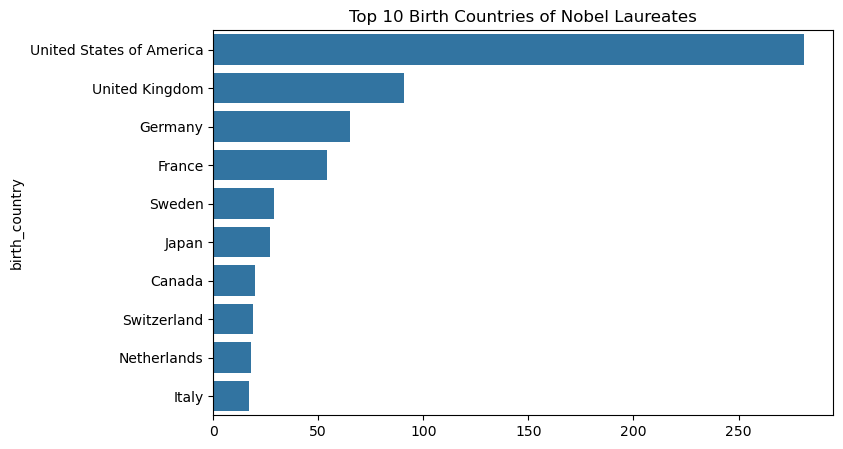

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index
)
plt.title("Top 10 Birth Countries of Nobel Laureates")
plt.show()


In [16]:
df["laureate_type"].value_counts()


laureate_type
Individual      930
Organization     32
Name: count, dtype: int64

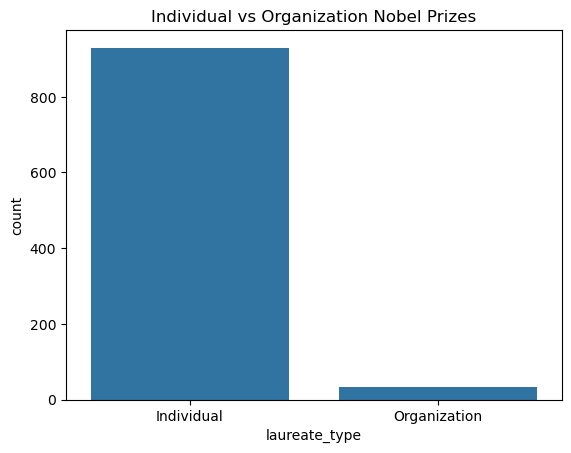

In [17]:
sns.countplot(x="laureate_type", data=df)
plt.title("Individual vs Organization Nobel Prizes")
plt.show()


In [18]:
df["birth_date"] = pd.to_datetime(df["birth_date"], errors="coerce")


In [19]:
df["age_at_award"] = df["year"] - df["birth_date"].dt.year


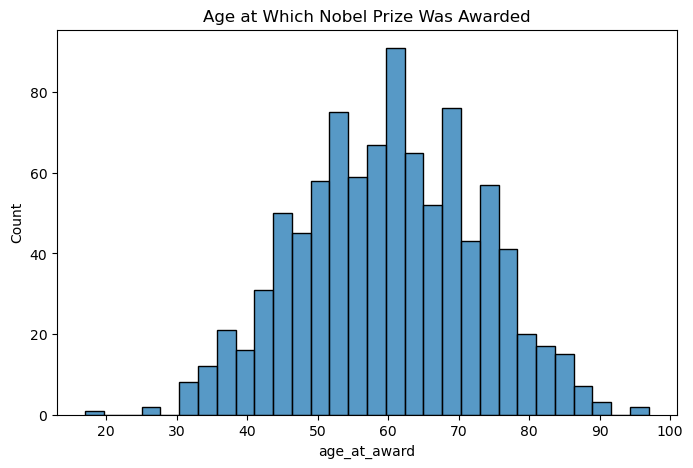

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["age_at_award"], bins=30)
plt.title("Age at Which Nobel Prize Was Awarded")
plt.show()


In [21]:
df["full_name"].value_counts().head()


full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: count, dtype: int64